C:\Users\aryan\AppData\Local\Temp\ipykernel_28252\3846612869.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('glacier.csv')
C:\Users\aryan\AppData\Local\Temp\ipykernel_28252\3846612869.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax1.boxplot(
C:\Users\aryan\AppData\Local\Temp\ipykernel_28252\3846612869.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax2.boxplot(


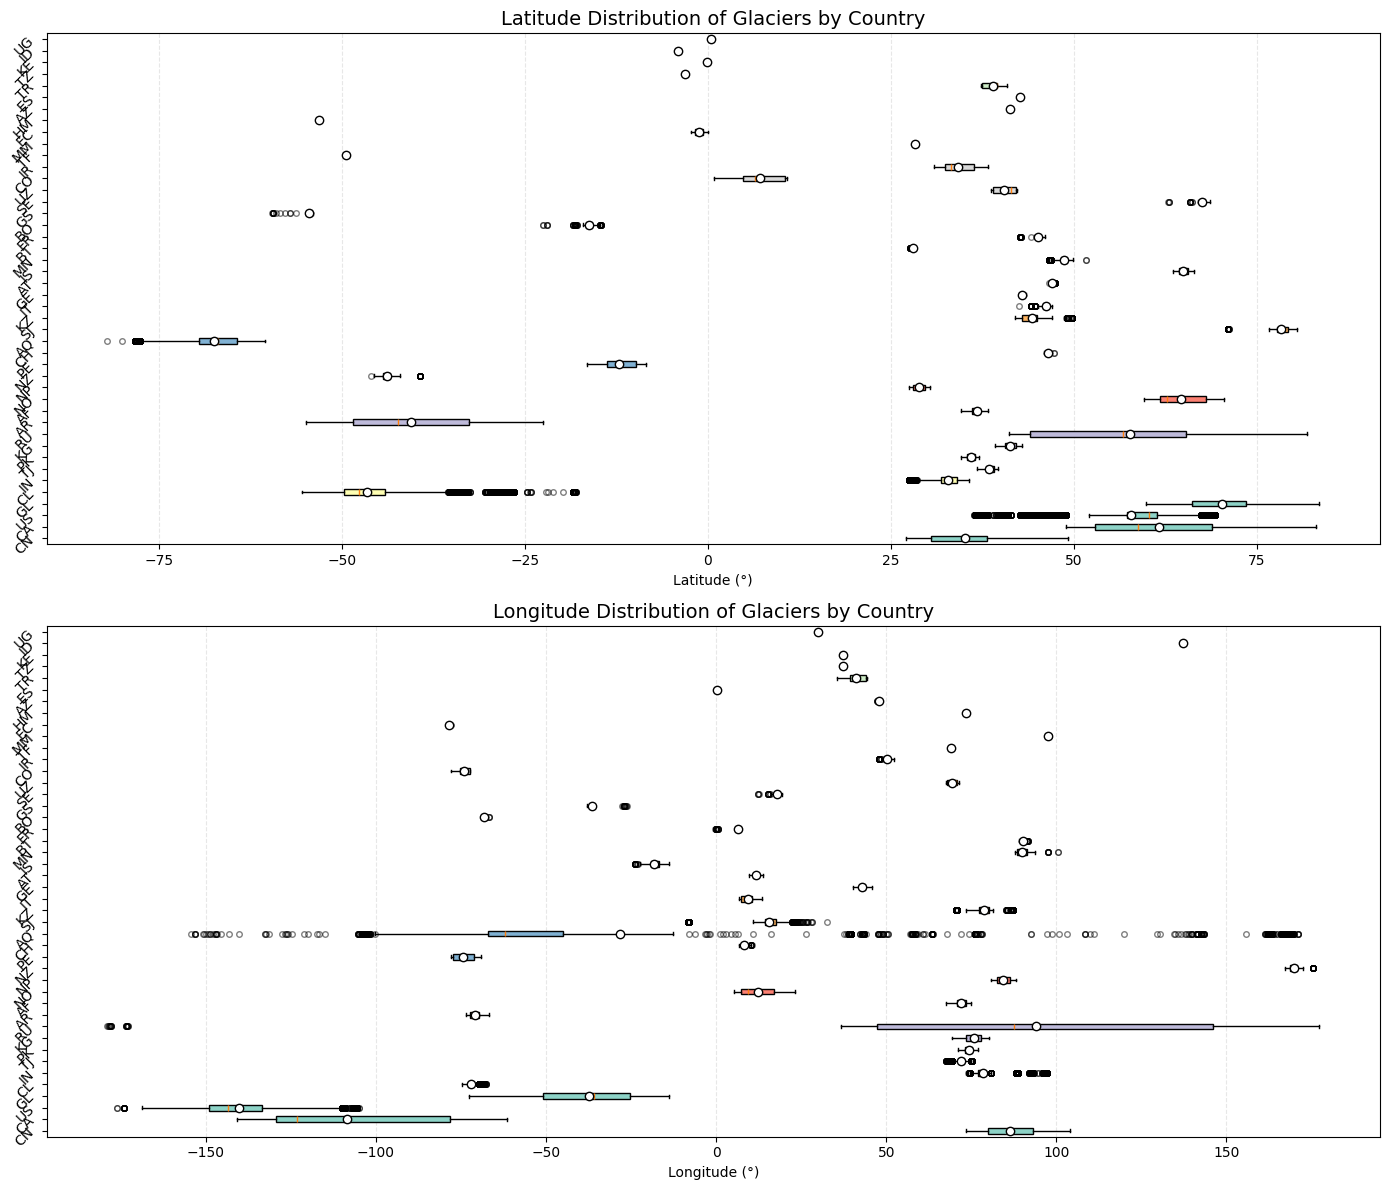

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
df = pd.read_csv('glacier.csv')

# Filter for countries with sufficient data
min_glaciers = 10  # Minimum glaciers to include a country
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts >= min_glaciers].index
df = df[df['country'].isin(valid_countries)]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Custom color palette
colors = plt.cm.Set3(np.linspace(0, 1, len(valid_countries)))

# 1. Latitude Distribution Boxplot
box1 = ax1.boxplot(
    [df[df['country'] == c]['latitude'] for c in valid_countries],
    patch_artist=True,
    labels=valid_countries,
    vert=False,
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'},
    flierprops={'marker':'o', 'markersize':4, 'alpha':0.5}
)

# Color the boxes
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title('Latitude Distribution of Glaciers by Country', fontsize=14)
ax1.set_xlabel('Latitude (°)')
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# 2. Longitude Distribution Boxplot
box2 = ax2.boxplot(
    [df[df['country'] == c]['longitude'] for c in valid_countries],
    patch_artist=True,
    labels=valid_countries,
    vert=False,
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'},
    flierprops={'marker':'o', 'markersize':4, 'alpha':0.5}
)

# Color the boxes (same order as first plot)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title('Longitude Distribution of Glaciers by Country', fontsize=14)
ax2.set_xlabel('Longitude (°)')
ax2.grid(axis='x', linestyle='--', alpha=0.3)

# Rotate country labels for readability
plt.setp(ax1.get_yticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_yticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()